# Simulation
### Objective
We will generate Illumina reads from a randomly selected genome of a single species, then process these reads using a metagenomic taxonomic analysis pipeline to evaluate the pipeline’s false positive rate.

### Genomes

In [20]:
from Bio import Entrez
import os
import requests
import pandas as pd
from ete3 import NCBITaxa, TreeStyle
import matplotlib.pyplot as plt

In [2]:
# Set your email
Entrez.email = "xli@chem.fsu.edu"

# List of RefSeq IDs
refseq_ids = [
    "GCF_000204415.1", "GCF_000016525.1", "GCF_000007345.1",
    "GCF_000063445.1", "GCF_002287195.1", "GCF_002310855.1",
    "GCF_000012325.1", "GCF_000967895.1", "GCF_009362255.1",
    "GCF_001653755.1", "GCF_000208865.1", "GCF_030704535.1",
    "GCF_000150955.2", "GCF_000002765.6", "GCF_032362555.1" ## randomly selected 15 species (5 for bacteria, 5 for archaea, 5 for eukaryota)
]


In [10]:
# Output directory
fna_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/'
os.makedirs(fna_dir, exist_ok=True)

In [8]:
# Download FASTA files using HTTPS
for refseq_id in refseq_ids:
    print(f"Processing {refseq_id}...")
    try:
        # Search and fetch the assembly
        handle = Entrez.esearch(db="assembly", term=refseq_id)
        record = Entrez.read(handle)
        handle.close()

        if record["IdList"]:
            assembly_id = record["IdList"][0]

            # Fetch assembly summary
            handle = Entrez.esummary(db="assembly", id=assembly_id)
            summary = Entrez.read(handle)
            handle.close()

            # Get HTTPS link for FASTA
            ftp_path = summary['DocumentSummarySet']['DocumentSummary'][0]['FtpPath_RefSeq']
            https_path = ftp_path.replace("ftp://", "https://")
            fasta_url = f"{https_path}/{os.path.basename(ftp_path)}_genomic.fna.gz"
            
            # Download the FASTA file
            response = requests.get(fasta_url, stream=True)
            if response.status_code == 200:
                output_file = os.path.join(fna_dir, os.path.basename(fasta_url))
                with open(output_file, "wb") as f:
                    for chunk in response.iter_content(chunk_size=1024):
                        f.write(chunk)
                print(f"Downloaded: {output_file}")
            else:
                print(f"Failed to download {refseq_id}: {response.status_code}")
        else:
            print(f"RefSeq ID {refseq_id} not found.")
    except Exception as e:
        print(f"Error with {refseq_id}: {e}")


Processing GCF_000204415.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_000204415.1_ASM20441v1_genomic.fna.gz
Processing GCF_000016525.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_000016525.1_ASM1652v1_genomic.fna.gz
Processing GCF_000007345.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_000007345.1_ASM734v1_genomic.fna.gz
Processing GCF_000063445.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_000063445.1_ASM6344v1_genomic.fna.gz
Processing GCF_002287195.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_002287195.1_ASM228719v1_genomic.fna.gz
Processing GCF_002310855.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fa/GCF_002310855.1_ASM231085v1_genomic.fna.gz
Processing GCF_000012325.1...
Downloaded: /home/xiangpeng/projects/16S_18S/code_for_github

### Read simulation using art_illumina
Run the following code in command line to generate FASTA silulation files. 
```
art_illumina -i GCF_000002765.6_GCA_000002765_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000002765.6
art_illumina -i GCF_000967895.1_ASM96789v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000967895.1
art_illumina -i GCF_000007345.1_ASM734v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000007345.1
art_illumina -i GCF_001653755.1_ASM165375v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_001653755.1
art_illumina -i GCF_000012325.1_ASM1232v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000012325.1
art_illumina -i GCF_002287195.1_ASM228719v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_002287195.1
art_illumina -i GCF_000016525.1_ASM1652v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000016525.1
art_illumina -i GCF_002310855.1_ASM231085v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_002310855.1
art_illumina -i GCF_000063445.1_ASM6344v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000063445.1
art_illumina -i GCF_009362255.1_ASM936225v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_009362255.1
art_illumina -i GCF_000150955.2_ASM15095v2_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000150955.2
art_illumina -i GCF_030704535.1_ASM3070453v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_030704535.1
art_illumina -i GCF_000204415.1_ASM20441v1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000204415.1
art_illumina -i GCF_032362555.1_ilAmyTran1.1_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_032362555.1
art_illumina -i GCF_000208865.1_ASM20886v2_genomic.fna.gz -p -l 150 -m 500 -s 50 -c 1000000 -o GCF_000208865.1


```
the pair-end fq.gz files are saved in folder: /home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/fq/

# Phylogenetic tree plot

In [14]:
spc_info =pd.read_csv(fna_dir +'Simulation_species_with_taxon_labels.csv')


,ncbi_id,Species,Assembly,refseq,Read_counts,superkingdom,kingdom,phylum,class,order,family,genus,species
0,36329,Plasmodium falciparum 3D7,GCA_000002765,GCF_000002765.6,1400000,NaN,NaN,Apicomplexa,Aconoidasida,Haemosporida,Plasmodiidae,Plasmodium,Plasmodium falciparum 3D7
1,188937,Methanosarcina acetivorans C2A,ASM734v1,GCF_000007345.1,100000,NaN,Methanobacteriati,Methanobacteriota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanosarcina,Methanosarcina acetivorans C2A
2,167879,Colwellia psychrerythraea 34H,ASM1232v1,GCF_000012325.1,100000,NaN,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Colwellia,Colwellia psychrerythraea 34H
3,420247,Methanobrevibacter smithii ATCC 35061,ASM1652v1,GCF_000016525.1,100000,NaN,Methanobacteriati,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter smithii ATCC 35061
4,351160,Methanocella arvoryzae MRE50,ASM6344v1,GCF_000063445.1,100000,NaN,Methanobacteriati,Methanobacteriota,Methanomicrobia,Methanocellales,Methanocellaceae,Methanocella,Methanocella arvoryzae MRE50
5,556484,Phaeodactylum tricornutum CCAP 1055/1,ASM15095v2,GCF_000150955.2,8273014,NaN,NaN,Bacillariophyta,Bacillariophyceae,Naviculales,Phaeodactylaceae,Phaeodactylum,Phaeodactylum tricornutum CCAP 1055/1
6,990316,Methanothrix soehngenii GP6,ASM20441v1,GCF_000204415.1,200000,NaN,Methanobacteriati,Methanobacteriota,Methanomicrobia,Methanotrichales,Methanotrichaceae,Methanothrix,Methanothrix soehngenii GP6
7,572307,Neospora caninum Liverpool,ASM20886v2,GCF_000208865.1,1397237,NaN,NaN,Apicomplexa,Conoidasida,Eucoccidiorida,Sarcocystidae,Neospora,Neospora caninum Liverpool
8,698738,Oleispira antarctica RB-8,ASM96789v1,GCF_000967895.1,100000,NaN,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Oleispira,Oleispira antarctica RB-8
9,1300343,Dokdonia donghaensis DSW-1,ASM165375v1,GCF_001653755.1,100000,NaN,Pseudomonadati,Bacteroidota,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Dokdonia,Dokdonia donghaensis DSW-1


In [17]:


# Specify the path to your NCBI taxonomy database (it's typically stored in your home directory)
ncbi = NCBITaxa('/home/xiangpeng/.etetoolkit/taxa.sqlite')

# Example: Querying for a list of taxids (e.g., 9606 for human, 7227 for fruit fly)
taxids = spc_info['ncbi_id'].tolist()

# Generate the tree
tree = ncbi.get_topology(taxids)

# Print the tree in Newick format
print(tree.write(format=0))  # Format 0 prints the tree in Newick format

((((36329:1,572307:1)1:1,556484:1)1:1,29760:1,680683:1)1:1,(((167879:1,1312369:1)1:1,698738:1)1:1,(104268:1,1300343:1)1:1)1:1,((188937:1,990316:1,351160:1)1:1,(1077256:1,420247:1)1:1)1:1);


<Figure size 1000x600 with 0 Axes>

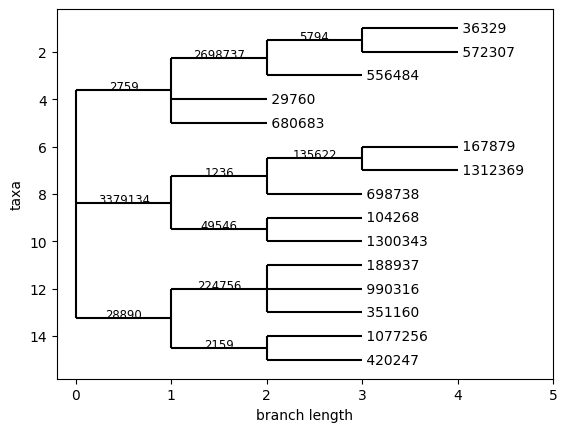

In [21]:
from Bio import Phylo
from io import StringIO
# Convert ETE3 tree to newick format
newick_str = tree.write(format=1)

# Read the newick string with Bio.Phylo
phylo_tree = Phylo.read(StringIO(newick_str), 'newick')

# Plot the tree
plt.figure(figsize=(10, 6))
Phylo.draw(phylo_tree)
plt.show()

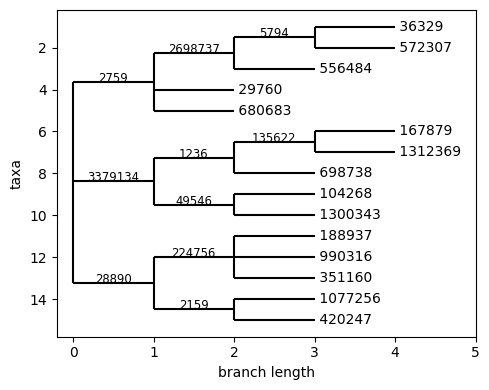

In [26]:
# Create figure with specific size and adjust layout
out_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/output/simulation/'

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)

# Draw tree with custom label function that only labels terminal nodes
Phylo.draw(phylo_tree, 
           axes=ax, 
           do_show=False,
           label_func=lambda x: x.name if x.is_terminal() else '')  # Only label if it's a terminal node

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.savefig(out_dir+ 'simulation_species_tree.pdf')

# Show plot
plt.show()

### CZID and Kaiju processing

#### Kaiju
kaiju were perfomed in Kbase.  https://narrative.kbase.us/narrative/202362

The output data were downloaded in to folder: ~/projects/16S_18S/code_for_github/data/simulation/kaiju/

$ ls ~/projects/16S_18S/code_for_github/data/simulation/kaiju/
```
GCF_000002765.6-class-longtail.kaijuReport
GCF_000002765.6-family-longtail.kaijuReport
GCF_000002765.6-genus-longtail.kaijuReport
GCF_000002765.6-order-longtail.kaijuReport
GCF_000002765.6-phylum-longtail.kaijuReport
GCF_000002765.6-species-longtail.kaijuReport
GCF_000007345.1-class-longtail.kaijuReport
GCF_000007345.1-family-longtail.kaijuReport
GCF_000007345.1-genus-longtail.kaijuReport
GCF_000007345.1-order-longtail.kaijuReport
GCF_000007345.1-phylum-longtail.kaijuReport
GCF_000007345.1-species-longtail.kaijuReport
GCF_000012325.1-class-longtail.kaijuReport
GCF_000012325.1-family-longtail.kaijuReport
GCF_000012325.1-genus-longtail.kaijuReport
GCF_000012325.1-order-longtail.kaijuReport
GCF_000012325.1-phylum-longtail.kaijuReport
GCF_000012325.1-species-longtail.kaijuReport
GCF_000016525.1-class-longtail.kaijuReport
GCF_000016525.1-family-longtail.kaijuReport
GCF_000016525.1-genus-longtail.kaijuReport
GCF_000016525.1-order-longtail.kaijuReport
GCF_000016525.1-phylum-longtail.kaijuReport
GCF_000016525.1-species-longtail.kaijuReport
GCF_000063445.1-class-longtail.kaijuReport
GCF_000063445.1-family-longtail.kaijuReport
GCF_000063445.1-genus-longtail.kaijuReport
GCF_000063445.1-order-longtail.kaijuReport
GCF_000063445.1-phylum-longtail.kaijuReport
GCF_000063445.1-species-longtail.kaijuReport
GCF_000150955.2-class-longtail.kaijuReport
GCF_000150955.2-family-longtail.kaijuReport
GCF_000150955.2-genus-longtail.kaijuReport
GCF_000150955.2-order-longtail.kaijuReport
GCF_000150955.2-phylum-longtail.kaijuReport
GCF_000150955.2-species-longtail.kaijuReport
GCF_000204415.1-class-longtail.kaijuReport
GCF_000204415.1-family-longtail.kaijuReport
GCF_000204415.1-genus-longtail.kaijuReport
GCF_000204415.1-order-longtail.kaijuReport
GCF_000204415.1-phylum-longtail.kaijuReport
GCF_000204415.1-species-longtail.kaijuReport
GCF_000208865.1-class-longtail.kaijuReport
GCF_000208865.1-family-longtail.kaijuReport
GCF_000208865.1-genus-longtail.kaijuReport
GCF_000208865.1-order-longtail.kaijuReport
GCF_000208865.1-phylum-longtail.kaijuReport
GCF_000208865.1-species-longtail.kaijuReport
GCF_000967895.1-class-longtail.kaijuReport
GCF_000967895.1-family-longtail.kaijuReport
GCF_000967895.1-genus-longtail.kaijuReport
GCF_000967895.1-order-longtail.kaijuReport
GCF_000967895.1-phylum-longtail.kaijuReport
GCF_000967895.1-species-longtail.kaijuReport
GCF_001653755.1-class-longtail.kaijuReport
GCF_001653755.1-family-longtail.kaijuReport
GCF_001653755.1-genus-longtail.kaijuReport
GCF_001653755.1-order-longtail.kaijuReport
GCF_001653755.1-phylum-longtail.kaijuReport
GCF_001653755.1-species-longtail.kaijuReport
GCF_002287195.1-class-longtail.kaijuReport
GCF_002287195.1-family-longtail.kaijuReport
GCF_002287195.1-genus-longtail.kaijuReport
GCF_002287195.1-order-longtail.kaijuReport
GCF_002287195.1-phylum-longtail.kaijuReport
GCF_002287195.1-species-longtail.kaijuReport
GCF_002310855.1-class-longtail.kaijuReport
GCF_002310855.1-family-longtail.kaijuReport
GCF_002310855.1-genus-longtail.kaijuReport
GCF_002310855.1-order-longtail.kaijuReport
GCF_002310855.1-phylum-longtail.kaijuReport
GCF_002310855.1-species-longtail.kaijuReport
GCF_009362255.1-class-longtail.kaijuReport
GCF_009362255.1-family-longtail.kaijuReport
GCF_009362255.1-genus-longtail.kaijuReport
GCF_009362255.1-order-longtail.kaijuReport
GCF_009362255.1-phylum-longtail.kaijuReport
GCF_009362255.1-species-longtail.kaijuReport
GCF_030704535.1-class-longtail.kaijuReport
GCF_030704535.1-family-longtail.kaijuReport
GCF_030704535.1-genus-longtail.kaijuReport
GCF_030704535.1-order-longtail.kaijuReport
GCF_030704535.1-phylum-longtail.kaijuReport
GCF_030704535.1-species-longtail.kaijuReport
GCF_03236255.1-class-longtail.kaijuReport
GCF_03236255.1-family-longtail.kaijuReport
GCF_03236255.1-genus-longtail.kaijuReport
GCF_03236255.1-order-longtail.kaijuReport
GCF_03236255.1-phylum-longtail.kaijuReport
GCF_03236255.1-species-longtail.kaijuReport
GCF_032362555.1-class-longtail.kaijuReport
GCF_032362555.1-family-longtail.kaijuReport
GCF_032362555.1-genus-longtail.kaijuReport
GCF_032362555.1-order-longtail.kaijuReport
GCF_032362555.1-phylum-longtail.kaijuReport
GCF_032362555.1-species-longtail.kaijuReport
```

#### CZID 
CZID were perfomed on czid.org 
The output data were downloaded in to folder: ~/projects/16S_18S/code_for_github/data/simulation/czid/

$ ls ~/projects/16S_18S/code_for_github/data/simulation/czid/
```
GCF_000002765.6_686526_taxon_report.csv
GCF_000007345.1_686527_taxon_report.csv
GCF_000012325.1_686528_taxon_report.csv
GCF_000016525.1_686529_taxon_report.csv
GCF_000063445.1_686515_taxon_report.csv
GCF_000150955.2_686516_taxon_report.csv
GCF_000204415.1_686517_taxon_report.csv
GCF_000208865.1_686518_taxon_report.csv
GCF_000967895.1_686519_taxon_report.csv
GCF_001653755.1_686520_taxon_report.csv
GCF_002287195.1_686521_taxon_report.csv
GCF_002310855.1_686522_taxon_report.csv
GCF_009362255.1_686523_taxon_report.csv
GCF_030704535.1_686524_taxon_report.csv
GCF_032362555.1_687440_taxon_report.csv
```

### Combine Kaiju files

In [28]:
taxa = ['phylum', 'class', 'order', 'family', 'genus', 'species'] 

In [33]:
# combine the 15 kaiju at various taxa level
kj_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/kaiju/'
refseq_ls = spc_info['refseq'].tolist()
for t in taxa:
    cmb_df =pd.DataFrame(columns =['taxon_id'])
    column_ls = []
    for refseq in refseq_ls:
        file = '{}{}-{}-longtail.kaijuReport'.format(kj_dir, refseq, t)
        df = pd.read_csv(file, sep = '\t')
        df = df.set_index('taxon_name')
        col = '{}_{}'.format(refseq, t)
        df = df.rename(columns={'reads':col})
        cmb_df = pd.concat([cmb_df,df[[col]]], axis=1)
        cmb_df.loc[df.index, 'taxon_id'] = df['taxon_id'].astype('str')
        column_ls.append(col)
    cmb_df[column_ls]=cmb_df[column_ls]/cmb_df[column_ls].sum()  
    cmb_df.to_csv(out_dir+'kaiju_simulation_combined_{}_level.csv'.format(t))
  

### Combine CZID files

In [35]:
czid_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/czid/'

In [45]:
import os
czid_files = os.listdir(czid_dir)
all_df_nt = pd.DataFrame()
all_df_nr = pd.DataFrame()

for f in czid_files:
    refseq = '_'.join(f.split('_')[:2])
    df =pd.read_csv(czid_dir + f, index_col = 0)
    df = df[df['tax_level']==1]
    df.rename(columns={'nt_rpm': '{}_nt_rpm'.format(refseq), 'nr_rpm': '{}_nr_rpm'.format(refseq)}, inplace=True)
    all_df_nt = pd.concat([all_df_nt, df['{}_nt_rpm'.format(refseq)].div(1000000)], axis =1)# combine the read per million by ncbi_id
    all_df_nt = all_df_nt.dropna(how='all')
    all_df_nr = pd.concat([all_df_nr, df['{}_nr_rpm'.format(refseq)].div(1000000)], axis =1)# combine the read per million by ncbi_id
    all_df_nr = all_df_nr.dropna(how='all')
# save the two files
all_df_nr.to_csv(out_dir+ "all_simulation_czid_nr.csv")
all_df_nt.to_csv(out_dir+ "all_simulation_czid_nt.csv")
all_nt_col = all_df_nt.columns.tolist()
all_nr_col = all_df_nr.columns.tolist()

In [42]:
all_df_nr.head()


,GCF_000967895.1_nr_rpm,GCF_001653755.1_nr_rpm,GCF_030704535.1_nr_rpm,GCF_000208865.1_nr_rpm,GCF_032362555.1_nr_rpm,GCF_000204415.1_nr_rpm,GCF_002310855.1_nr_rpm,GCF_000150955.2_nr_rpm,GCF_000007345.1_nr_rpm,GCF_009362255.1_nr_rpm,GCF_002287195.1_nr_rpm,GCF_000002765.6_nr_rpm,GCF_000016525.1_nr_rpm,GCF_000063445.1_nr_rpm,GCF_000012325.1_nr_rpm
1449799,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92647,0.000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1697053,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182327,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030817,0.005060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
all_df_nt.head()

,GCF_000967895.1_nt_rpm,GCF_001653755.1_nt_rpm,GCF_030704535.1_nt_rpm,GCF_000208865.1_nt_rpm,GCF_032362555.1_nt_rpm,GCF_000204415.1_nt_rpm,GCF_002310855.1_nt_rpm,GCF_000150955.2_nt_rpm,GCF_000007345.1_nt_rpm,GCF_009362255.1_nt_rpm,GCF_002287195.1_nt_rpm,GCF_000002765.6_nt_rpm,GCF_000016525.1_nt_rpm,GCF_000063445.1_nt_rpm,GCF_000012325.1_nt_rpm
188908,0.9951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326320,NaN,0.99317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313590,NaN,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149353,NaN,NaN,4.257935e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2136672,NaN,NaN,4.257935e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# add taxon info to the file 
ncbi_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/data/simulation/'
df_ncbi = pd.read_csv(ncbi_dir  + "simulation_czi_ncbi_id_to_taxon.csv", )

In [53]:
df_ncbi

,superkingdom,kingdom,phylum,class,order,family,genus,species,tax_id
0,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Dipsacales,Caprifoliaceae,Diabelia,Diabelia spathulata,761859
1,Eukaryota,Metazoa,Arthropoda,Insecta,Hemiptera,Aphididae,Periphyllus,Periphyllus acericola,1425412
2,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Malpighiales,Salicaceae,Homalium,Homalium ceylanicum,1679365
3,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Erwiniaceae,Buchnera,Buchnera aphidicola,9
4,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Ericales,Ericaceae,Rhododendron,Rhododendron molle,49168
...,...,...,...,...,...,...,...,...,...
3214,Bacteria,Bacillati,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus sp. FJAT-22090,1581038
3215,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Lamiales,Scrophulariaceae,Buddleja,Buddleja sp. GJ33,2965489
3216,Eukaryota,Metazoa,Arthropoda,Insecta,Hemiptera,Pentatomidae,Halyomorpha,Halyomorpha halys,286706
3217,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Caryophyllales,Nepenthaceae,Nepenthes,Nepenthes ventricosa x Nepenthes alata,1744888
